### Import necessary modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Overview

In [4]:
# Load dataset
data = pd.read_csv("npa.csv")

In [5]:
# Preview data head
print(data.head())

   CustomerID  Age  Gender  PurchaseAmount  PurchaseFrequency  \
0           1   38  Female      749.097626                 24   
1           2   30    Male      735.224916                 18   
2           3   55    Male     1145.520305                 22   
3           4   39  Female      925.460535                 14   
4           5   51    Male      108.359916                  9   

   ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
0                     2                   1                      3   
1                     5                   4                      4   
2                     3                   5                      4   
3                     4                   3                      2   
4                     3                   3                      2   

   WebsiteEaseOfUseRating  ReturnRate  DiscountUsage LoyaltyProgramMember  
0                       5        0.12     135.392573                   No  
1                       5        0.3

In [6]:
# Summary statistics of the data
print(data.describe())

       CustomerID         Age  PurchaseAmount  PurchaseFrequency  \
count  500.000000  500.000000      500.000000         500.000000   
mean   250.500000   44.170000     1065.050731          14.308000   
std    144.481833   14.813777      583.199658           8.151197   
min      1.000000   18.000000       51.799790           1.000000   
25%    125.750000   32.000000      535.083407           7.000000   
50%    250.500000   44.000000     1100.884065          14.000000   
75%    375.250000   58.000000     1584.348124          22.000000   
max    500.000000   69.000000     1999.655968          29.000000   

       ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
count             500.00000          500.000000               500.0000   
mean                2.93400            3.008000                 3.0780   
std                 1.41054            1.372481                 1.4156   
min                 1.00000            1.000000                 1.0000   
25%              

### Clean the Dataset

In [8]:
# Check for null values
print(data.isnull().sum())

CustomerID                0
Age                       0
Gender                    0
PurchaseAmount            0
PurchaseFrequency         0
ProductQualityRating      0
DeliveryTimeRating        0
CustomerServiceRating     0
WebsiteEaseOfUseRating    0
ReturnRate                0
DiscountUsage             0
LoyaltyProgramMember      0
dtype: int64


### Create histogram for numerical features

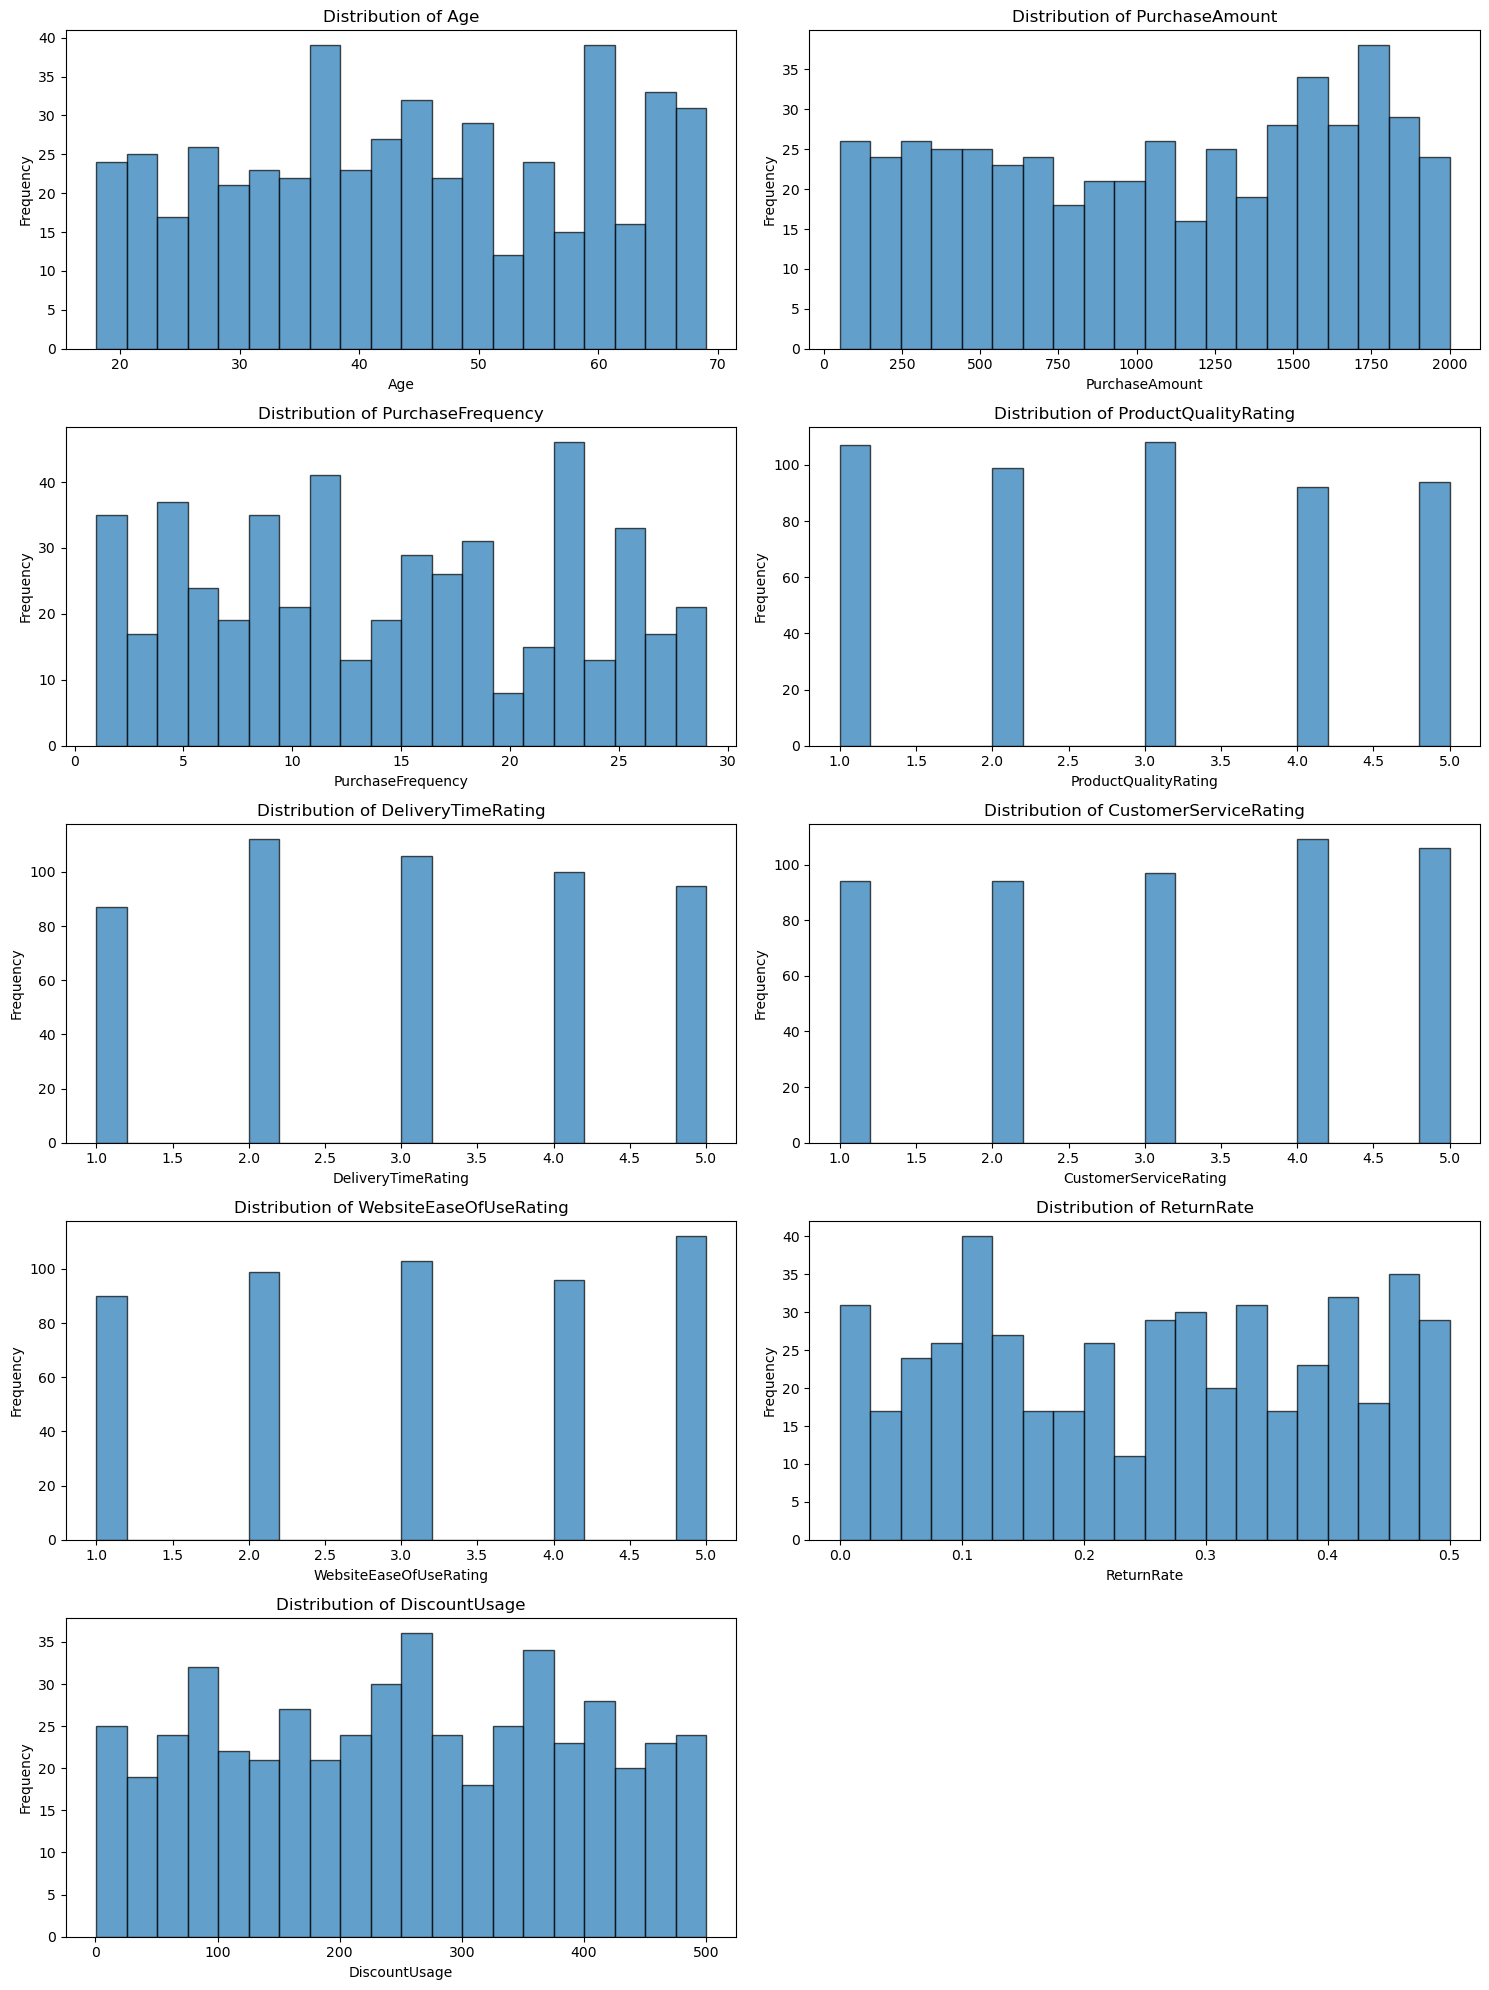

In [10]:
numeric_cols = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    plt.hist(data[col], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Segment the customers based on demographic and behavioral factors

  AgeGroup  Gender  ProductQualityRating  DeliveryTimeRating  \
0    18-29  Female                  3.05                3.21   
1    18-29    Male                  2.93                3.00   
2    30-39  Female                  2.93                2.86   
3    30-39    Male                  3.08                2.82   
4    40-49  Female                  3.09                2.89   
5    40-49    Male                  2.86                3.17   
6    50-59  Female                  2.95                2.95   
7    50-59    Male                  2.83                2.90   
8    60-69  Female                  2.90                3.30   
9    60-69    Male                  2.67                2.94   

   CustomerServiceRating  WebsiteEaseOfUseRating  
0                   3.18                    2.91  
1                   3.33                    3.36  
2                   2.91                    3.07  
3                   2.98                    2.88  
4                   3.04                

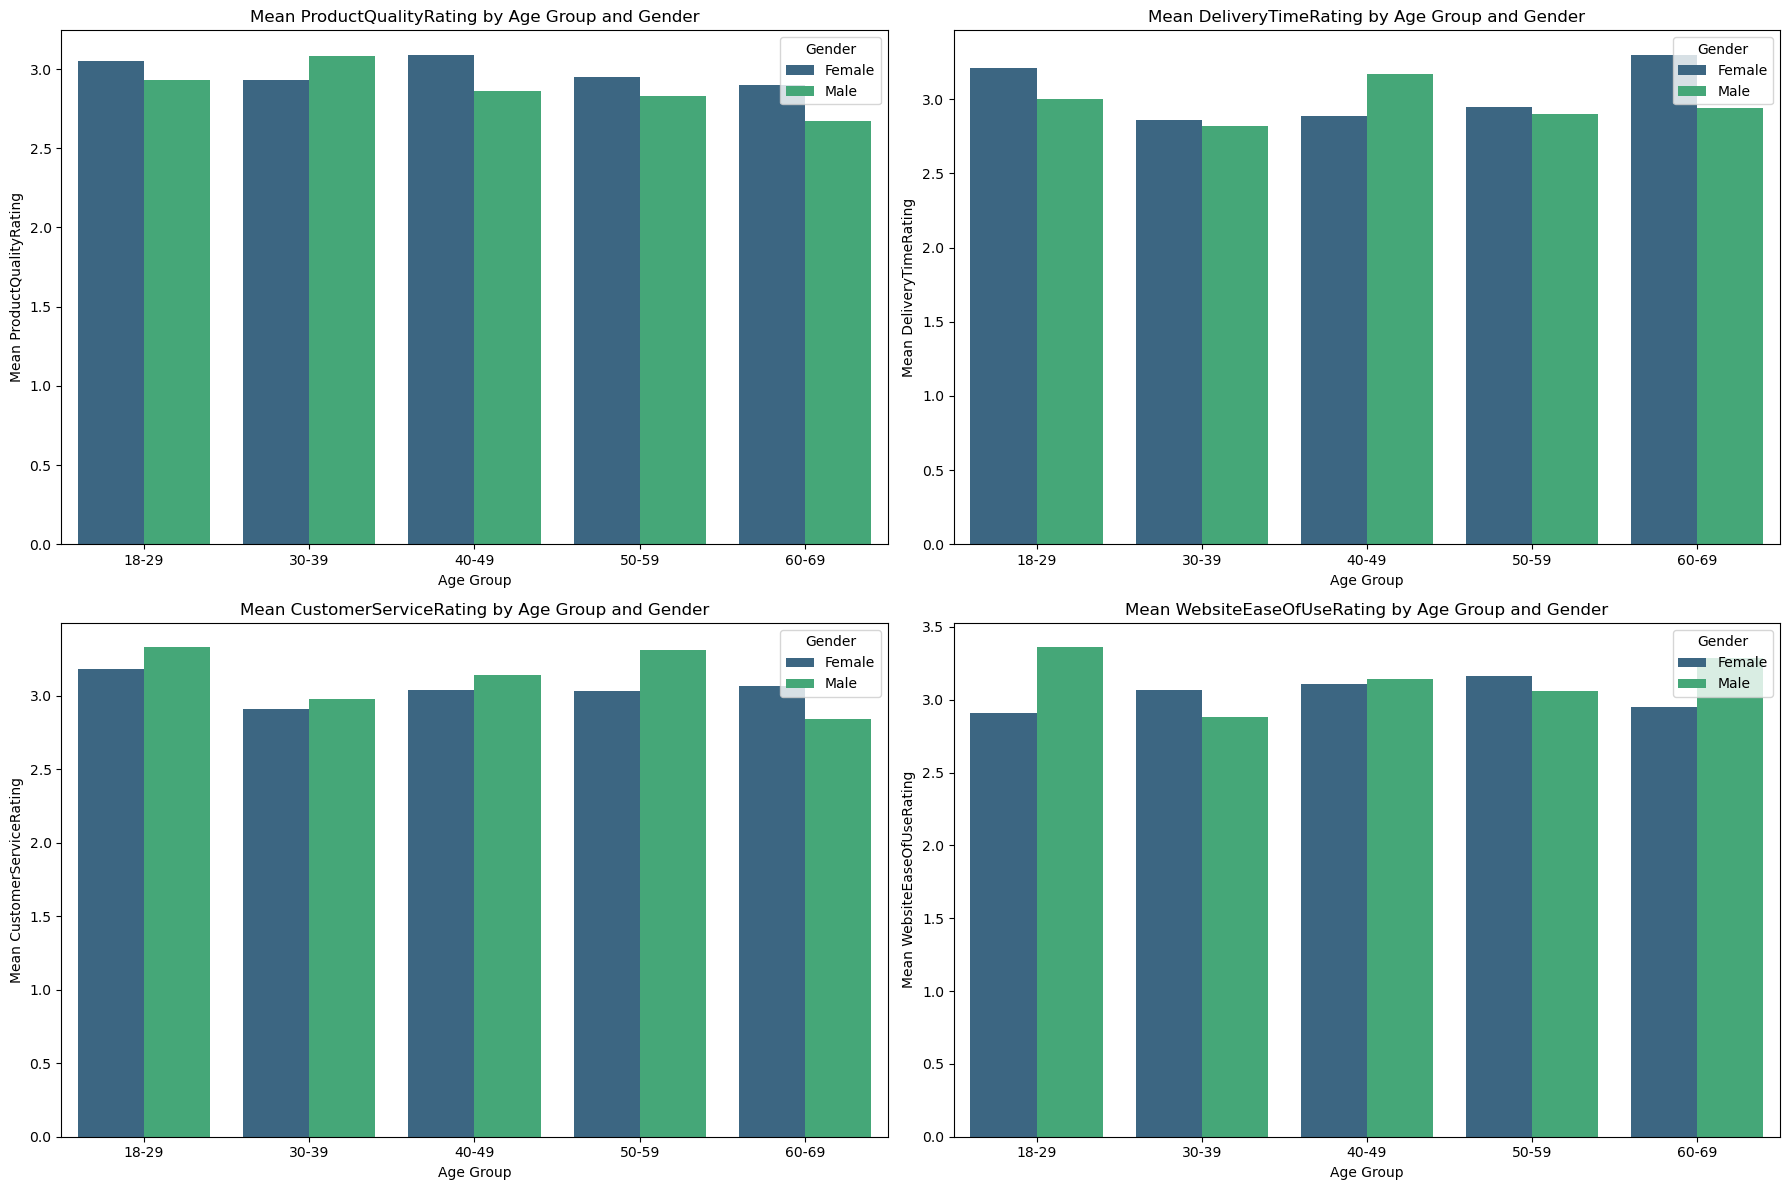

In [12]:
# Create age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Select only the numeric columns for calculation
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']

# Calculate mean ratings by age group and gender
mean_ratings_age_gender = data.groupby(['AgeGroup', 'Gender'], observed=True)[numeric_columns].mean().reset_index()

#Round the mean values to 2 decimal places
mean_ratings_age_gender = mean_ratings_age_gender.round(2)

# Display the resulting DataFrame
print(mean_ratings_age_gender)

# Visualizations
plt.figure(figsize=(18, 12))

# Loop through each numeric column and create a bar plot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=mean_ratings_age_gender, x='AgeGroup', y=col, hue='Gender', palette='viridis')
    plt.title(f'Mean {col} by Age Group and Gender')
    plt.xlabel('Age Group')
    plt.ylabel(f'Mean {col}')
    plt.legend(title='Gender', loc='upper right')

plt.tight_layout()
plt.show()

### Segment mean ratings for specific numeric columns grouped by loyalty program

In [32]:
# Select only the numeric columns for calculation
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

# Calculate mean ratings by loyalty program membership
mean_ratings_loyalty = data.groupby('LoyaltyProgramMember', observed=True)[numeric_columns].mean().reset_index()

# Round the mean values to 2 decimal places
mean_ratings_loyalty = mean_ratings_loyalty.round(2)

# Display the resulting DataFrame
print(mean_ratings_loyalty)

  LoyaltyProgramMember  ProductQualityRating  DeliveryTimeRating  \
0                   No                  2.92                2.92   
1                  Yes                  2.95                3.09   

   CustomerServiceRating  WebsiteEaseOfUseRating  ReturnRate  DiscountUsage  
0                   2.99                    3.11        0.25         241.43  
1                   3.16                    3.06        0.25         260.11  


### Calculate the Net Promoter Score

In [43]:
# define NPS categories based on customer service rating
data['NPS_Category'] = pd.cut(data['CustomerServiceRating'], bins=[0, 6, 8, 10], labels=['Detractors', 'Passives', 'Promoters'], right=False)

# calculate NPS
nps_counts = data['NPS_Category'].value_counts(normalize=True) * 100
nps_score = nps_counts['Promoters'] - nps_counts['Detractors']

# Display the results
print("NPS Category Percentages:")
print(nps_counts)
print("\nNPS Score:", nps_score)

NPS Category Percentages:
NPS_Category
Detractors    100.0
Passives        0.0
Promoters       0.0
Name: proportion, dtype: float64

NPS Score: -100.0


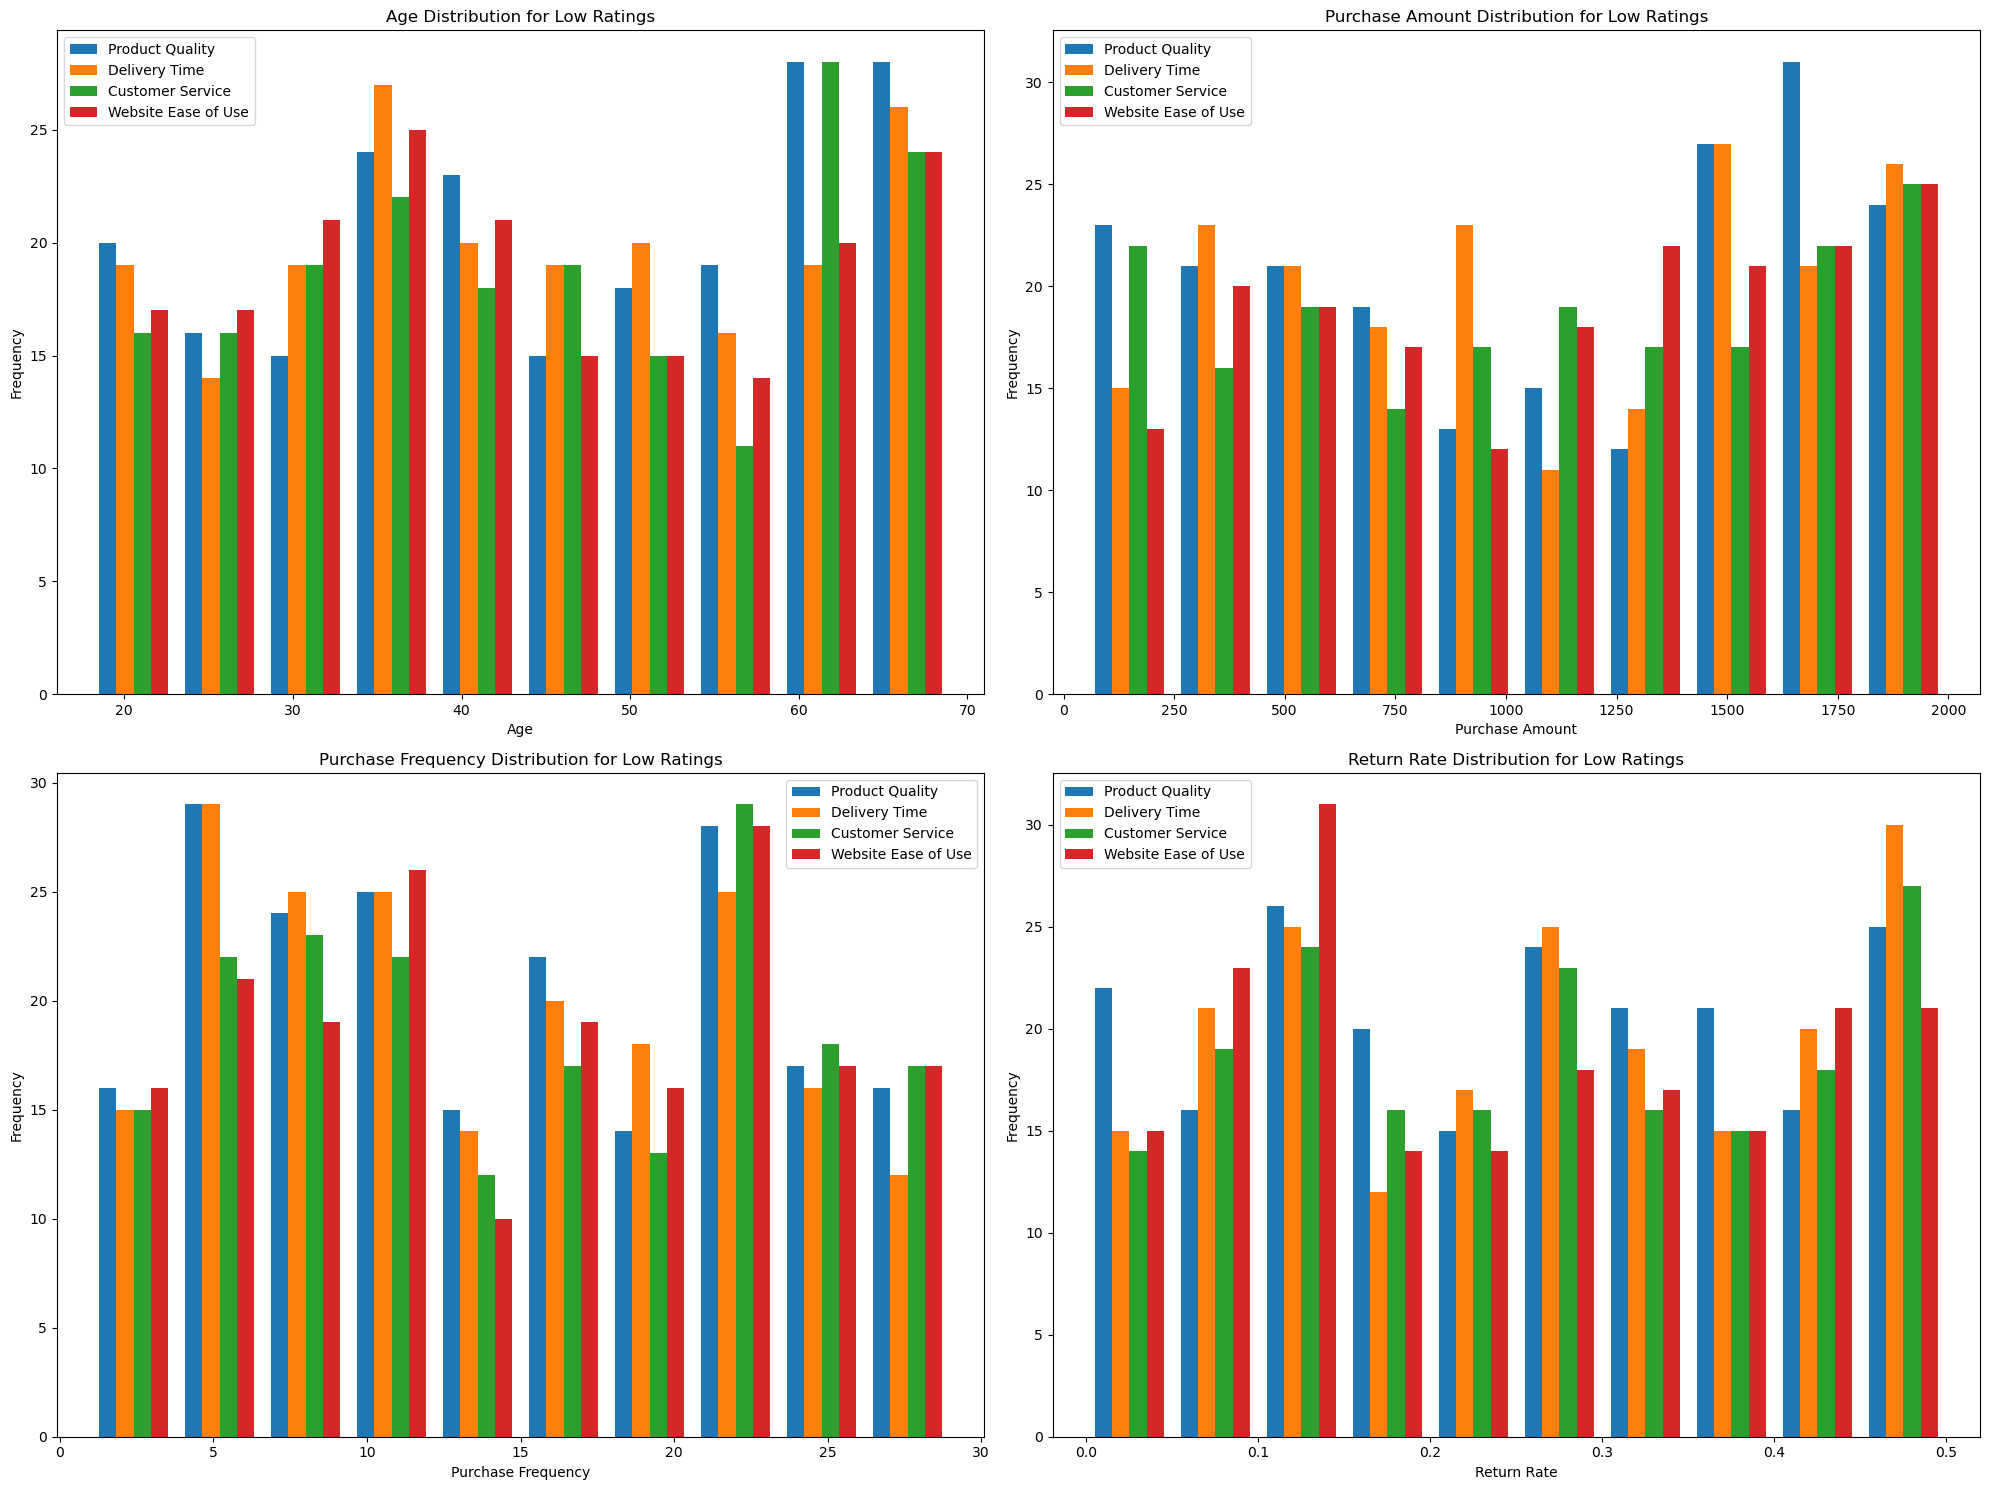

In [47]:
# Define low rating threshold
low_rating_threshold = 2

# Create subsets for low ratings in different aspects
low_product_quality = data[data['ProductQualityRating'] <= low_rating_threshold]
low_delivery_time = data[data['DeliveryTimeRating'] <= low_rating_threshold]
low_customer_service = data[data['CustomerServiceRating'] <= low_rating_threshold]
low_website_ease_of_use = data[data['WebsiteEaseOfUseRating'] <= low_rating_threshold]

# Plot the characteristics for each low rating subset
plt.figure(figsize=(20, 15))

# Age distribution for low ratings
plt.subplot(2, 2, 1)
plt.hist([low_product_quality['Age'], low_delivery_time['Age'], low_customer_service['Age'], low_website_ease_of_use['Age']], 
         bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Age Distribution for Low Ratings')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Purchase amount distribution for low ratings
plt.subplot(2, 2, 2)
plt.hist([low_product_quality['PurchaseAmount'], low_delivery_time['PurchaseAmount'], low_customer_service['PurchaseAmount'], low_website_ease_of_use['PurchaseAmount']], 
         bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Amount Distribution for Low Ratings')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()

# Purchase frequency distribution for low ratings
plt.subplot(2, 2, 3)
plt.hist([low_product_quality['PurchaseFrequency'], low_delivery_time['PurchaseFrequency'], low_customer_service['PurchaseFrequency'], low_website_ease_of_use['PurchaseFrequency']], 
         bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Frequency Distribution for Low Ratings')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.legend()

# Return rate distribution for low ratings
plt.subplot(2, 2, 4)
plt.hist([low_product_quality['ReturnRate'], low_delivery_time['ReturnRate'], low_customer_service['ReturnRate'], low_website_ease_of_use['ReturnRate']], 
         bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Return Rate Distribution for Low Ratings')
plt.xlabel('Return Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

### Customer Satisfaction Analysis

Average Ratings:
 ProductQualityRating      2.934
DeliveryTimeRating        3.008
CustomerServiceRating     3.078
WebsiteEaseOfUseRating    3.082
dtype: float64


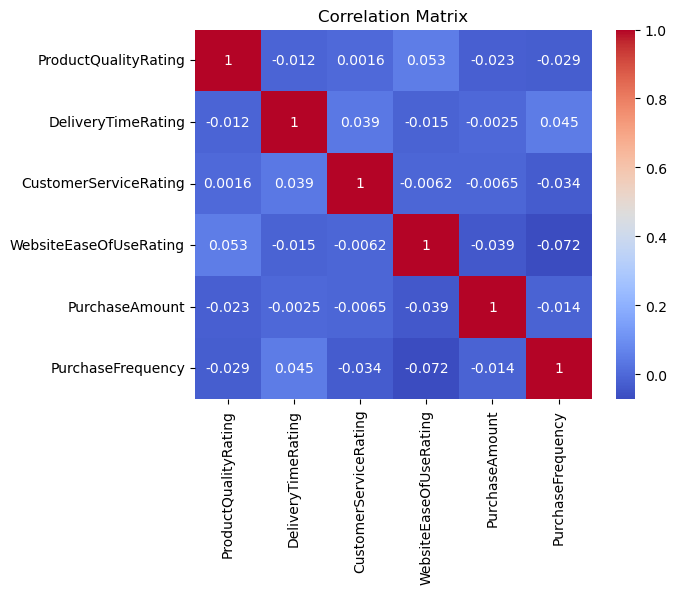

In [54]:
# Calculate average ratings
avg_ratings = data[['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']].mean()
print("Average Ratings:\n", avg_ratings)

# Correlation between satisfaction ratings and purchase behavior
correlation_matrix = data[['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'PurchaseAmount', 'PurchaseFrequency']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Return Rate Analysis

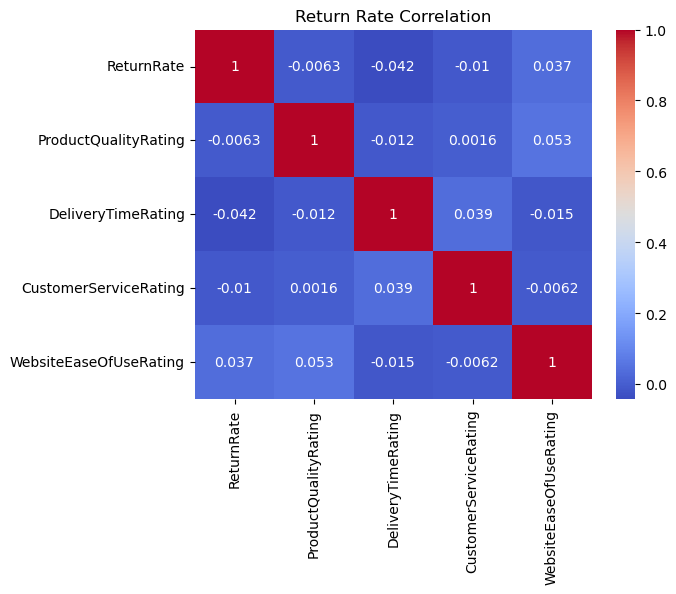

Average Return Rate by Loyalty Program:
 LoyaltyProgramMember
No     0.251883
Yes    0.252644
Name: ReturnRate, dtype: float64


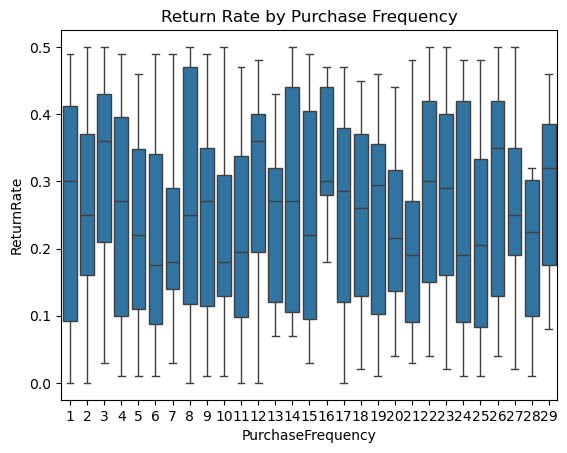

In [56]:
# Correlation between return rate and satisfaction ratings
return_correlation = data[['ReturnRate', 'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']].corr()
sns.heatmap(return_correlation, annot=True, cmap='coolwarm')
plt.title("Return Rate Correlation")
plt.show()

# Segment by Loyalty Program
loyalty_return = data.groupby('LoyaltyProgramMember')['ReturnRate'].mean()
print("Average Return Rate by Loyalty Program:\n", loyalty_return)

# Visualize Return Rate by Purchase Frequency
sns.boxplot(x='PurchaseFrequency', y='ReturnRate', data=data)
plt.title("Return Rate by Purchase Frequency")
plt.show()